# 1. Подготовка к работе

In [1]:
# Подгружаем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import scipy
from scipy import stats

%matplotlib inline

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
    rc={
        "figure.figsize": (18, 10),
        "axes.titlesize": 20,
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        'legend.handlelength': 3,
        'legend.title_fontsize': 16
    }
)

sns.set_style("whitegrid")
sns.set_palette("RdGy", 4)

# 2. Загрузка данных

Имеется следующая информация:

**ab_orders.csv** – подробная информация о составе заказа, для каждого заказа есть список id тех продуктов, которые были включены в заказ.  
**ab_users_data.csv** – история заказов пользователей, в этой таблице есть информация о том, какие заказы создавали и отменяли пользователи.  
**ab_products.csv** – подробная информация о продуктах, их название и стоимость.

In [3]:
# Считываем данные

path_to_ab_orders     = 'ab_orders.csv'
path_to_ab_products   = 'ab_products.csv'
path_to_ab_users_data = 'ab_users_data.csv'

orders_data   = pd.read_csv(path_to_ab_orders)
products_data = pd.read_csv(path_to_ab_products)
users_data    = pd.read_csv(path_to_ab_users_data)

### Предварительное исследование данных таблицы orders_data

In [4]:
# Проверим первые 5 строк
orders_data.head()

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19.000000,"{75, 22, 53, 84}"
1,1256,2022-08-26 00:02:21.000000,"{56, 76, 39}"
2,1257,2022-08-26 00:02:27.000000,"{76, 34, 41, 38}"
3,1258,2022-08-26 00:02:56.000000,"{74, 6}"
4,1259,2022-08-26 00:03:37.000000,"{20, 45, 67, 26}"


In [5]:
# Посмотрим размер данных
orders_data.shape

(4123, 3)

In [6]:
# Посмотрим количество уникальных значений
orders_data.nunique()

order_id         4123
creation_time    4098
product_ids      3877
dtype: int64

In [7]:
# Посмотрим тип переменных
orders_data.dtypes

order_id          int64
creation_time    object
product_ids      object
dtype: object

In [8]:
# Приведем переменные к нужному формату
orders_data.creation_time = pd.to_datetime(orders_data.creation_time)

In [9]:
# Посмотрим тип переменных
orders_data.dtypes

order_id                  int64
creation_time    datetime64[ns]
product_ids              object
dtype: object

In [10]:
# Проверим наличие пропущенных значений
orders_data.isna().sum()

order_id         0
creation_time    0
product_ids      0
dtype: int64

In [11]:
# Проверим наличие дубликатов
orders_data.duplicated().sum()

0

С данными все в порядке, все order_id уникальны, нет пропущенных значений, нет дубликатов, во всех заказах есть товары, все переменные имеют нужный тип.

### Предварительное исследование данных таблицы products_data

In [12]:
# Проверим первые 5 строк
products_data.head()

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0


In [13]:
# Посмотрим размер данных
products_data.shape

(87, 3)

In [14]:
# Посмотрим количество уникальных значений
products_data.nunique()

product_id    87
name          87
price         63
dtype: int64

In [15]:
# Посмотрим тип переменных
products_data.dtypes

product_id      int64
name           object
price         float64
dtype: object

In [16]:
# Проверим наличие пропущенных значений
products_data.isna().sum()

product_id    0
name          0
price         0
dtype: int64

In [17]:
# Проверим наличие дубликатов
products_data.duplicated().sum()

0

С данными все в порядке, все product_id уникальны, нет пропущенных значений, нет дубликатов, все переменные имеют нужный тип.

### Предварительное исследование данных таблицы users_data

In [18]:
# Проверим первые 5 строк
users_data.head()

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19.000000,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21.000000,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27.000000,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56.000000,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37.000000,2022-08-26,1


In [19]:
# Посмотрим размер данных
users_data.shape

(4337, 6)

In [20]:
# Посмотрим количество уникальных значений
users_data.nunique()

user_id     1017
order_id    4123
action         2
time        4312
date          14
group          2
dtype: int64

In [21]:
# Посмотрим, какие действия пользователь мог совершать с заказом
users_data.action.unique()

array(['create_order', 'cancel_order'], dtype=object)

In [22]:
# Посмотрим тип переменных
users_data.dtypes

user_id      int64
order_id     int64
action      object
time        object
date        object
group        int64
dtype: object

In [23]:
# Приведем нужные столбцы к формату даты
users_data[['time', 'date']] = (users_data[['time', 'date']]).apply(pd.to_datetime)

In [24]:
# Посмотрим тип переменных
users_data.dtypes

user_id              int64
order_id             int64
action              object
time        datetime64[ns]
date        datetime64[ns]
group                int64
dtype: object

In [25]:
# Проверим наличие пропущенных значений
users_data.isna().sum()

user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64

In [26]:
# Проверим наличие дубликатов
users_data.duplicated().sum()

0

In [27]:
# Посмотрим количество пользователей по группам
print('Количество пользователей в контрольной группе:',
      users_data.query('group == 0').user_id.nunique())
print('Количество пользователей в тестовой группе:',
      users_data.query('group == 1').user_id.nunique())

Количество пользователей в контрольной группе: 515
Количество пользователей в тестовой группе: 502


С данными все в порядке, нет пропущенных значений, нет дубликатов, все переменные имеют нужный тип, все пользователи делали заказы.

### Создадим дополнительные таблицы

**1. Создадим таблицу заказов по товарам.**

In [28]:
# Разделим набор товаров на отдельные товары

product_orders_data = orders_data.rename(columns={'product_ids': 'product_id'})
product_orders_data.product_id = product_orders_data.product_id.apply(lambda x: x.strip('{}').split(', '))
product_orders_data = product_orders_data.explode('product_id')
product_orders_data.product_id = product_orders_data.product_id.astype(int)
product_orders_data.head()

,order_id,creation_time,product_id
0,1255,2022-08-26 00:00:19,75
0,1255,2022-08-26 00:00:19,22
0,1255,2022-08-26 00:00:19,53
0,1255,2022-08-26 00:00:19,84
1,1256,2022-08-26 00:02:21,56


In [29]:
# Посмотрим размер данных
product_orders_data.shape

(13826, 3)

**2. Создадим полную таблицу заказов.**

In [30]:
# Создадим полную таблицу заказов

full_data = product_orders_data \
    .merge(users_data, on='order_id') \
    .merge(products_data, on='product_id')
full_data.head()

,order_id,creation_time,product_id,user_id,action,time,date,group,name,price
0,1255,2022-08-26 00:00:19,75,964,create_order,2022-08-26 00:00:19,2022-08-26,0,сок ананасовый,120.0
1,1287,2022-08-26 00:31:36,75,987,create_order,2022-08-26 00:31:36,2022-08-26,0,сок ананасовый,120.0
2,1403,2022-08-26 03:01:40,75,1073,create_order,2022-08-26 03:01:40,2022-08-26,1,сок ананасовый,120.0
3,1424,2022-08-26 04:01:22,75,1089,create_order,2022-08-26 04:01:22,2022-08-26,1,сок ананасовый,120.0
4,1495,2022-08-26 06:04:05,75,1139,create_order,2022-08-26 06:04:05,2022-08-26,1,сок ананасовый,120.0


In [31]:
# Посмотрим размер данных
full_data.shape

(14569, 10)

In [32]:
# Посмотрим количество уникальных значений
full_data.nunique()

order_id         4123
creation_time    4098
product_id         87
user_id          1017
action              2
time             4312
date               14
group               2
name               87
price              63
dtype: int64

**3. Создадим таблицу по статусам заказов - отменен или нет, оставляем только актуальный статус заказа.**

In [33]:
orders_users = orders_data.merge(users_data, on='order_id')

cancel_order_id = orders_users.query("action == 'cancel_order'").order_id
clean_data = orders_users.query("action == 'create_order' and order_id in @cancel_order_id")
status_order = pd.concat([orders_users, clean_data]) \
    .drop_duplicates(keep=False) \
    .rename(columns={'action': 'is_canceled'})

status_order.loc[(status_order.is_canceled == 'create_order'), 'is_canceled'] = 0
status_order.loc[(status_order.is_canceled == 'cancel_order'), 'is_canceled'] = 1

status_order = status_order[['order_id', 'group', 'is_canceled']]
status_order.head()

,order_id,group,is_canceled
0,1255,0,0
1,1256,1,0
2,1257,0,0
4,1258,0,1
5,1259,1,0


In [34]:
# Проверим корректность
print('Количество заказов в полученном датафрейме:', status_order.shape[0])
print('Количество уникальных заказов в первоначальном датафрейме:', orders_data.order_id.nunique())

Количество заказов в полученном датафрейме: 4123
Количество уникальных заказов в первоначальном датафрейме: 4123


**4. Создадим полную таблицу без отмененных заказов**.

In [35]:
non_cancelled_orders = full_data.loc[:]
clean_full_data = full_data.query("order_id in @cancel_order_id")
non_cancelled_orders.drop(clean_full_data.index, inplace=True)
non_cancelled_orders.head()

,order_id,creation_time,product_id,user_id,action,time,date,group,name,price
0,1255,2022-08-26 00:00:19,75,964,create_order,2022-08-26 00:00:19,2022-08-26,0,сок ананасовый,120.0
1,1287,2022-08-26 00:31:36,75,987,create_order,2022-08-26 00:31:36,2022-08-26,0,сок ананасовый,120.0
2,1403,2022-08-26 03:01:40,75,1073,create_order,2022-08-26 03:01:40,2022-08-26,1,сок ананасовый,120.0
3,1424,2022-08-26 04:01:22,75,1089,create_order,2022-08-26 04:01:22,2022-08-26,1,сок ананасовый,120.0
4,1495,2022-08-26 06:04:05,75,1139,create_order,2022-08-26 06:04:05,2022-08-26,1,сок ананасовый,120.0


In [36]:
# Посмотрим размер данных
non_cancelled_orders.shape

(13083, 10)

In [37]:
# Посмотрим количество уникальных значений
non_cancelled_orders.nunique()

order_id         3909
creation_time    3886
product_id         87
user_id          1013
action              1
time             3886
date               14
group               2
name               87
price              63
dtype: int64

Видим, что были пользователи, которые отменили все свои заказы.

**5. Разделим заказы по группам**

In [38]:
# Разделим заказы по группам
group_0 = non_cancelled_orders.query('group == 0')
group_1 = non_cancelled_orders.query('group == 1')

Соотношение величин по группам будет исследовано далее.

# 3. Выбор метрик

Чтобы проверить эффективность системы рекомендаций, был проведен АБ-тест. В группе 1 оказались пользователи с новой системой рекомендаций, в группе 0 пользователи со старой версией приложения, где нет рекомендации товаров.

Наша задача – оценить, смогла ли новая система рекомендаций принести пользу бизнесу и пользователям приложения. Для этого выберем метрики, которые отвечают за качество сервиса и статистически сравним эти метрики в двух группах.

Для нашего бизнеса важно получать больше доходов. Для пользователей важно удовлетворить свои потребности, то есть купить то, что им нужно.

### Для всех заказов посмотрим следующую метрику: 
___
**CancR (Cancellation Rate — доля отмененных заказов)** — эта метрика показывает долю отмененных заказов.

$$
Cancellation\ Rate = {Количество\ отмененных\ заказов\over{Количество\ заказов}} \times 100\%
$$

___

 
Так как отмененные заказы не принесут нашему бизнесу никакой прибыли, и пользователь ничего не получит, то дальнейшие метрики мы будем исследовать только для заказов, которые не были отменены, то есть для тех, которые потенциально могут принести нам прибыль и удовлетворить потребности пользователей. 

___
___
___

### Для заказов, которые не были отменены, посмотрим следующие метрики: 
___

**AOV (Average Order Value — средний чек)** — эта метрика показывает среднюю сумму заказа клиентов.

$$
Average\ Order\ Value = {Выручка\over{Количество\ заказов}} 
$$

___

**AOS (Average Order Size — средний размер чека)** — эта метрика показывает средний размер заказа клиентов.

$$
Average\ Order\ Size = {Количество\ товаров\over{Количество\ заказов}} 
$$

___

**ARPU (Average Revenue per User — средний доход с пользователя)** — эта метрика показывает средний доход от одного активного пользователя.

$$
Average\ Revenue\ per\ Paying\ User = {Доход\over{Количество\ пользователей}}  
$$

___

**PF (Purchase Frequency — частота покупок)** — эта метрика показывает, как часто клиент совершает повторную покупку.

$$
Purchase\ Frequency = {Количество\ заказов\over{Количество\ уникальных\ клиентов}}
$$

___

**RPR (Repeat Purchase Rate — коэффициент повторных покупок)** — показывает, сколько клиентов возвращается после первой покупки.

$$
Repeat\ Purchase\ Rate = {Количество\ пользователей,\ совершивших\ повторную\ покупку\over{Количество\ пользователей, совершивших\ покупку}}\times100\%
$$
___

Для этого нам нужно найти:

**Total User (общее количество пользователей)** — эта метрика показывает общее количество пользователей.   
**Total Revenue (общий доход)** — эта метрика показывает весь доход.  
**Total Order (общее количество заказов)** — эта метрика показывает общее количество заказов.  
**Total Product (общее количество товаров)** — эта метрика показывает общее количество купленных товаров.  
**Repeat Purchase (повторная покупка)** — количество повторных покупок.  
**Period (период наблюдения)** — количество дней проведения наблюдения.  

# 4. Статистическая проверка результатов АБ-теста
## Cancellation Rate

Мы имеем две категориальные переменные: группы - 0 и 1 (контрольная и тестовая), статус заказа - 0 и 1 (не отменен и отменен), поэтому для исследования будем использовать критерий хи-квадрат. Он подходит для анализа таблицы сопряженности любого размера, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 10, проверим.

In [39]:
# Ранее созданная таблица
status_order.head()

,order_id,group,is_canceled
0,1255,0,0
1,1256,1,0
2,1257,0,0
4,1258,0,1
5,1259,1,0


In [40]:
# Создадим таблицу сопряженности
contingency_canc = pd.crosstab(status_order.group, status_order.is_canceled)
contingency_canc

is_canceled,0,1
group,,
0,1527,82
1,2382,132


In [41]:
# Создадим нормированную таблицу сопряженности, чтобы узнать долю отмененных заказов
norm_contingency_canc = pd.crosstab(status_order.group, status_order.is_canceled, normalize='index')
norm_contingency_canc

is_canceled,0,1
group,,
0,0.949037,0.050963
1,0.947494,0.052506


Видим, что доля отмененных заказов с введением новой системы рекомендаций особо не изменилась, однако пока что это еще ни о чем не говорит. 

Проанализируем таблицу сопряженности. Мы хотим проверить, зависит ли доля отмененных заказов от группы.  

$H_{0}$: распределение не зависит от группы  
$H_{1}$: распределение зависит от группы

In [42]:
# Критерий хи-квадрат

statistic, pvalue, dof, expected_freq = stats.chi2_contingency(contingency_canc)
print(f'''
Хи-квадрат = {statistic}
p-value = {pvalue}
Количество степеней свободы = {dof}
Ожидаемые наблюдения:
{expected_freq}
''')


Хи-квадрат = 0.021274207290295187
p-value = 0.8840344321879333
Количество степеней свободы = 1
Ожидаемые наблюдения:
[[1525.48653893   83.51346107]
 [2383.51346107  130.48653893]]



Видим, что нулевую гипотезу отклонить мы не можем, так как p-value больше уровня значимости 0.05.  
**Вывод: критерий хи-квадрат показал, что статзначимых изменений нет и доля отмененных заказов (Cancellation Rate) не зависит от группы**.

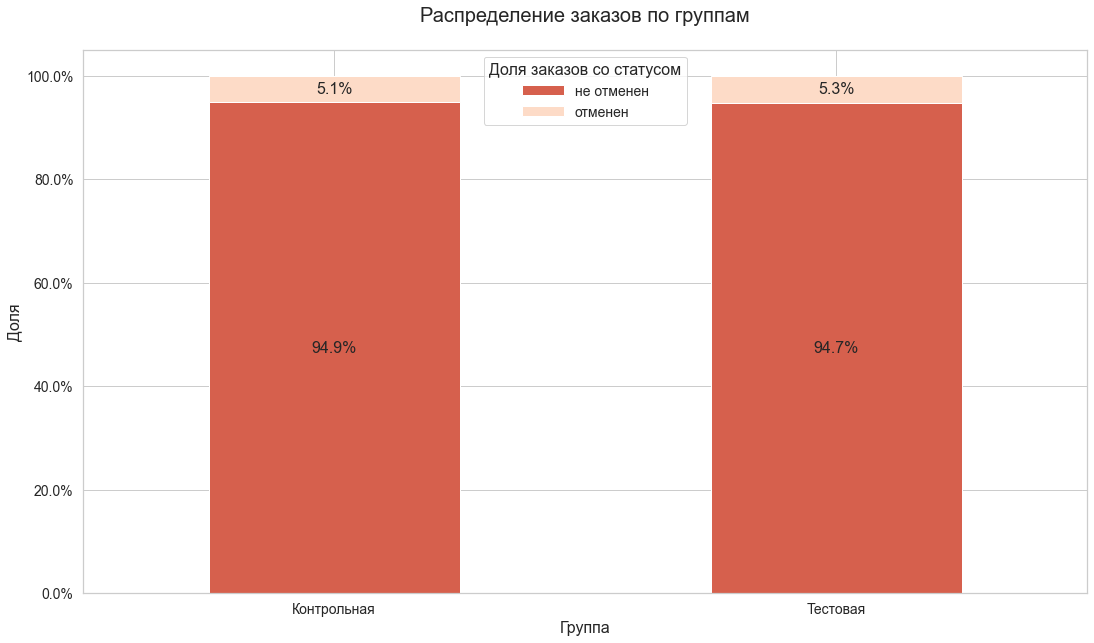

In [43]:
# Строим диаграмму

ax = norm_contingency_canc.plot(kind="bar", stacked=True, rot=0)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['Контрольная', 'Тестовая'])
ax.legend(['не отменен', 'отменен'],
          title='Доля заказов со статусом', loc='upper center')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.1%}'.format(height),
            horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.xlabel('Группа')
plt.ylabel('Доля')
plt.title('Распределение заказов по группам\n')
plt.show()

Новая рекомендательная система не повлияла на отмену заказов, значит, заказы отменяют по другим причинам.  
Проанализируем заказы, которые не были отменены.

## Анализ заказов, которые не были отменены

In [44]:
# Ранее созданный датафрейм
non_cancelled_orders.head()

,order_id,creation_time,product_id,user_id,action,time,date,group,name,price
0,1255,2022-08-26 00:00:19,75,964,create_order,2022-08-26 00:00:19,2022-08-26,0,сок ананасовый,120.0
1,1287,2022-08-26 00:31:36,75,987,create_order,2022-08-26 00:31:36,2022-08-26,0,сок ананасовый,120.0
2,1403,2022-08-26 03:01:40,75,1073,create_order,2022-08-26 03:01:40,2022-08-26,1,сок ананасовый,120.0
3,1424,2022-08-26 04:01:22,75,1089,create_order,2022-08-26 04:01:22,2022-08-26,1,сок ананасовый,120.0
4,1495,2022-08-26 06:04:05,75,1139,create_order,2022-08-26 06:04:05,2022-08-26,1,сок ананасовый,120.0


In [45]:
# Найдем все нужные метрики, которые были перечислены выше
df = non_cancelled_orders \
    .groupby('group', as_index=False) \
    .agg({'user_id': 'nunique', 'price': 'sum', 'order_id': 'nunique', 'product_id': 'count', 'date': np.ptp}) \
    .rename(columns={'user_id': 'total_user', 'price': 'total_revenue', 'order_id': 'total_order',
                     'product_id': 'total_product', 'date': 'period'})

repeat_purchase = non_cancelled_orders \
    .groupby(['user_id', 'group'], as_index=False) \
    .agg(purchase=('order_id', 'nunique')) \
    .query('purchase > 1') \
    .groupby('group', as_index=False) \
    .agg(repeat_purchase=('purchase', 'count'))

df = df.merge(repeat_purchase, on='group')

df['aov'] = df.total_revenue / df.total_order
df['aos'] = df.total_product / df.total_order
df['arpu'] = df.total_revenue / df.total_user
df['pf'] = df.total_order / df.total_user
df['rpr'] = round(df.repeat_purchase / df.total_user * 100, 1)
df

,group,total_user,total_revenue,total_order,total_product,period,repeat_purchase,aov,aos,arpu,pf,rpr
0,0,512,583455.9,1527,5103,13 days,414,382.092927,3.341847,1139.562305,2.982422,80.9
1,1,501,878628.4,2382,7980,13 days,470,368.861629,3.350126,1753.749301,4.754491,93.8


In [46]:
# Посмотрим разницу величин в двух группах
difference = df.diff(axis=0).drop('group', axis=1).drop(0, axis=0)
difference

,total_user,total_revenue,total_order,total_product,period,repeat_purchase,aov,aos,arpu,pf,rpr
1,-11.0,295172.5,855.0,2877.0,0 days,56.0,-13.231298,0.008279,614.186997,1.772069,12.9


Заметим, что периоды наблюдения равны.  
Видим, что несмотря на то, что в тестовой группе меньше людей, как в общем, так и тех, кто не отменял заказ, выросли следующие показатели (смотрим в разрезе потенциальных покупок, так как статус заказа на данный момент - "создан", мы не знаем, что произойдет с ним дальше):
- общий доход
- количество заказов
- количество купленных продуктов
- количество повторных покупок

Выросли и интересующие нас метрики, изменения которых мы хотим проверить:
- AOS - среднее количество товаров на заказ
- ARPU - средний доход с пользователя
- PF - частота покупок
- RPR - коэффициент повторных покупок

Уменьшился только показатель AOV - средняя сумма заказа, люди совершают заказы на меньшую сумму, но в большем количестве.  
Однако нам предстоит узнать, статзначимы ли эти изменения или они обусловлены, например, дисперсией показателей.

### Выбор статистических тестов

Теперь нам нужно определиться со статистическими тестами.

**RPR:**  
В RPR у нас фигурирует количество пользователей, совершивших повторную покупку, то есть пользователи делятся на "совершил"/"не совершил" - категориальная переменная, вторая категориальная переменная - группа (0 или 1). Из этого следует, что будем использовать ***критерий хи-квадрат (или критерий согласия Пирсона)***. Он подходит для анализа таблицы сопряженности любого размера, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 10.  

В остальных метриках уже фигурируют количественные переменные. Групп у нас всего 2, поэтому использовать дисперсионный анализ мы не будем. Посмотрим на требования к проведению тестов.  

Требования к проведению ***t-теста (t-критерий Стьюдента)***:

- Дисперсии внутри групп должны быть примерно одинаковы (требование гомогенности дисперсий).
- Необходимо, чтобы выборочные средние имели нормальное распределение. При маленьких выборках это означает требование нормальности исходных значений. Выбросы могут оказать значительное влияние на результаты t-теста. На практике t-тест может быть использован для сравнения средних и при **ненормальном распределении, особенно на больших выборках и, если в данных нет заметных выбросов**. В нашем случае выборки большие, поэтому нужно посмотреть только выбросы.

Однако в случае гетероскедастичности дисперсий может быть применен ***t-критерий Уэлча***, который является модификацией t-критерия Стьюдента и не требует равенства дисперсий. Требование о нормальном распределении сохраняется.


***Непараметрический U-критерий Манна-Уитни*** не столь чувствителен к наличию выбросов по сравнению с t-тестом, однако этот критерий плохо интерпретируется в отношении денег и бизнеса, поэтому если t-тест нам не подойдет, то будем использовать ***бутстрап***. Строго говоря, нам ничего не мешает применить его для всех наших метрик, потому что ему не страшны ненормальность распределения и гетероскедастичность дисперсий. Однако на практике бутстрап может быть слишком ресурозатратным, поэтому при возможности применим более простой и быстрый метод.

In [47]:
# Подготовим данные для проверки изменения метрик

group_0_aos = group_0.groupby('order_id', as_index=False).agg(product_count=('product_id', 'count'))
group_1_aos = group_1.groupby('order_id', as_index=False).agg(product_count=('product_id', 'count'))

group_0_arpu = group_0.groupby('user_id', as_index=False).agg(revenue=('price', 'sum'))
group_1_arpu = group_1.groupby('user_id', as_index=False).agg(revenue=('price', 'sum'))
                                                              
group_0_pf = group_0.groupby('user_id', as_index=False).agg(order_count=('order_id', 'nunique'))
group_1_pf = group_1.groupby('user_id', as_index=False).agg(order_count=('order_id', 'nunique'))
                                                              
group_0_aov = group_0.groupby('order_id', as_index=False).agg(revenue=('price', 'sum'))
group_1_aov = group_1.groupby('order_id', as_index=False).agg(revenue=('price', 'sum'))                                                              

Для начала проведем проверку равенства дисперсий по критерию Левина.  
Гипотеза $H_0$: дисперсии равны  
Гипотеза $H_1$: дисперсии различны

In [48]:
print(f'''
Проверка распределений на равенство дисперсий (требование гомогенности дисперсий) 

Распределение количества товаров по заказам:
p-value = {stats.levene(group_0_aos.product_count, group_1_aos.product_count)[1]}

Распределение дохода по пользователям:
p-value = {stats.levene(group_0_arpu.revenue, group_1_arpu.revenue)[1]}

Распределение количества заказов по пользователям:
p-value = {stats.levene(group_0_pf.order_count, group_1_pf.order_count)[1]}

Распределение дохода по заказам:
p-value = {stats.levene(group_0_aov.revenue, group_1_aov.revenue)[1]}''')


Проверка распределений на равенство дисперсий (требование гомогенности дисперсий) 

Распределение количества товаров по заказам:
p-value = 0.18125424676983376

Распределение дохода по пользователям:
p-value = 1.896012459520485e-05

Распределение количества заказов по пользователям:
p-value = 3.654438888775981e-05

Распределение дохода по заказам:
p-value = 0.31453758452176295


У первого и последнего тестов значение p-value больше уровня значимости 0.05, поэтому мы можем принять нулевую гипотезу и сказать, что в данных случаях имеет место **равенство дисперсий**. Однако стоит проверить распределения на наличие сильных выбросов, которые могут оказать влияние. Если сильных выбросов не будет, то будем использовать t-критерий Стьюдента, если будут, то бутстрап.  

Значение p-value у двух остальных тестов меньше нашего уровня значимости 0.05. Таким образом, в этих случаях мы отвергаем нулевую гипотезу и заключаем, что среди групп **дисперсии различны**. Проверим распределения на наличие сильных выбросов и решим, что будем использовать t-критерий Уэлча или бутстрап.

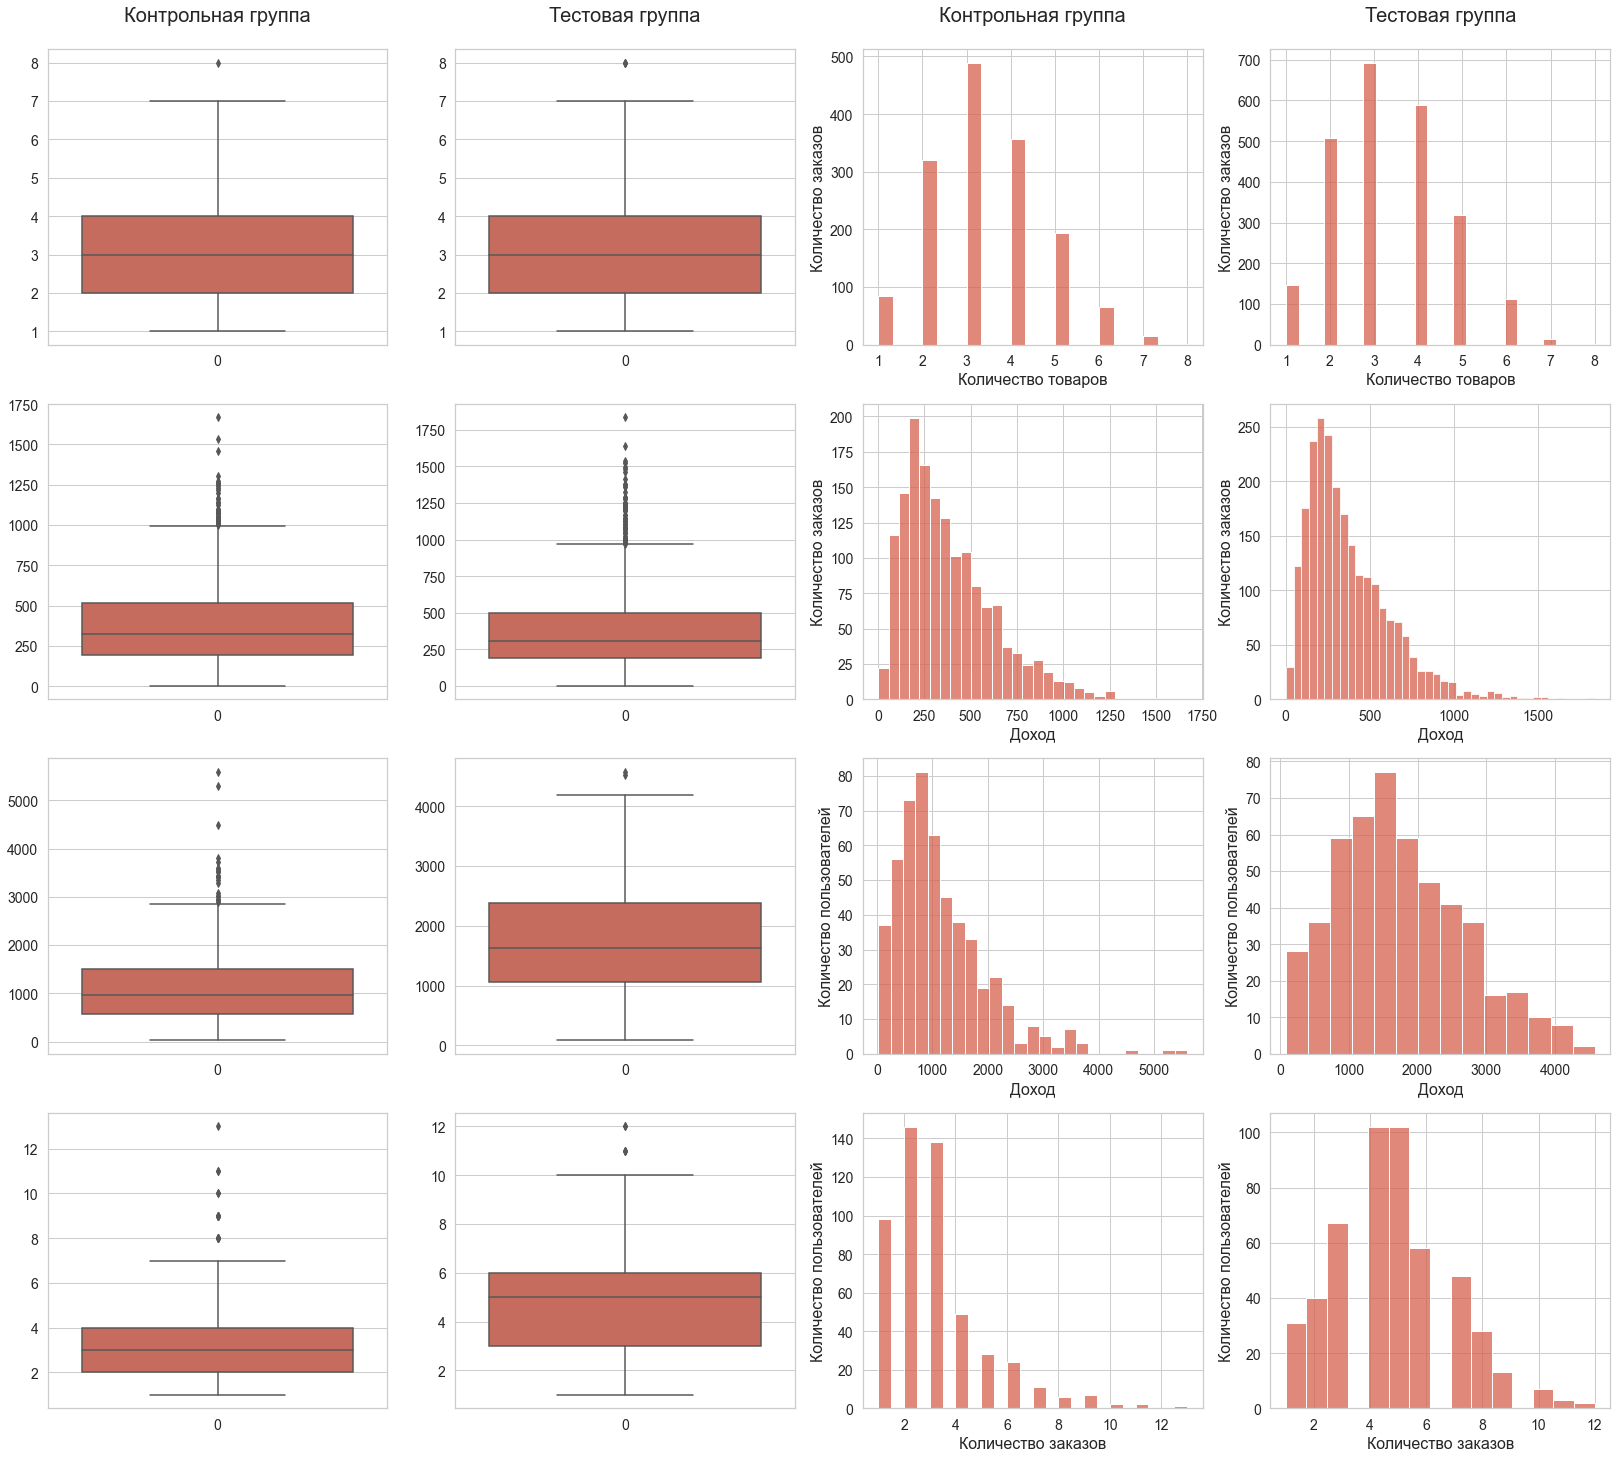

In [49]:
# Посмотрим на распределения и выбросы
fig, axs = plt.subplots(4, 4, figsize=(28, 25))

sns.boxplot(data=group_0_aos.product_count, orient='Vertical', ax=axs[0, 0]).set_title('Контрольная группа\n')
sns.boxplot(data=group_1_aos.product_count, orient='Vertical', ax=axs[0, 1]).set_title('Тестовая группа\n')

sns.histplot(group_0_aos.product_count, ax=axs[0, 2]) \
    .set(xlabel='Количество товаров', ylabel='Количество заказов', title='Контрольная группа\n')
sns.histplot(group_1_aos.product_count, ax=axs[0, 3]) \
    .set(xlabel='Количество товаров', ylabel='Количество заказов', title='Тестовая группа\n')

sns.boxplot(data=group_0_aov.revenue, orient='Vertical', ax=axs[1, 0])
sns.boxplot(data=group_1_aov.revenue, orient='Vertical', ax=axs[1, 1])

sns.histplot(group_0_aov.revenue, ax=axs[1, 2]).set(xlabel='Доход', ylabel='Количество заказов')
sns.histplot(group_1_aov.revenue, ax=axs[1, 3]).set(xlabel='Доход', ylabel='Количество заказов')

sns.boxplot(data=group_0_arpu.revenue, orient='Vertical', ax=axs[2, 0])
sns.boxplot(data=group_1_arpu.revenue, orient='Vertical', ax=axs[2, 1])

sns.histplot(group_0_arpu.revenue, ax=axs[2, 2]).set(xlabel='Доход', ylabel='Количество пользователей')
sns.histplot(group_1_arpu.revenue, ax=axs[2, 3]).set(xlabel='Доход', ylabel='Количество пользователей')

sns.boxplot(data=group_0_pf.order_count, orient='Vertical', ax=axs[3, 0])
sns.boxplot(data=group_1_pf.order_count, orient='Vertical', ax=axs[3, 1])

sns.histplot(group_0_pf.order_count, ax=axs[3, 2]).set(xlabel='Количество заказов', ylabel='Количество пользователей')
sns.histplot(group_1_pf.order_count, ax=axs[3, 3]).set(xlabel='Количество заказов', ylabel='Количество пользователей')

plt.show()

В целом мы видим, что распределения не являются нормальными, однако выбросы в распределениях находятся с одной стороны от среднего, представляя собой "длинный хвост распределения" (даже существует такая бизнес-модель, связанная с продажами), боксплоты в целом очень похожи.  
Из увиденного мы можем сделать вывод о том, что данные выбросы не окажут значительного влияния на t-тест.  
Поэтому остановимся на ***t-критерии Стьюдента*** для групп, которые обладают гомогенностью дисперсий.  
И на ***t-критерий Уэлча*** для групп, которые не облают.  
Так как выборки у нас достаточно большие t-тест должен дать приблизительно точный результат, несмотря на ненормальность распределения.

## Average Order Size, Average Order Value, Average Revenue per User, Purchase Frequency

Проведем t-тесты.  
Гипотеза $H_0$: средние равны  
Гипотеза $H_1$: средние различны 

Для групп с равными дисперсиями:

In [50]:
stats.ttest_ind(group_0_aos.product_count, group_1_aos.product_count)

Ttest_indResult(statistic=-0.19638057741712578, pvalue=0.84432251088501)

In [51]:
stats.ttest_ind(group_0_aov.revenue, group_1_aov.revenue)

Ttest_indResult(statistic=1.6334875192269402, pvalue=0.10244707728234669)

В обоих случаях p-value больше уровня значимости - 0.05, поэтому мы принимаем нулевую гипотезу и делаем вывод, что средние в группах не различаются.  
**Вывод: t-критерий Стьюдента показал, что AOS, AOV статзначимо не изменились.**

Для групп с неравными дисперсиями:

In [52]:
stats.ttest_ind(group_0_arpu.revenue, group_1_arpu.revenue, equal_var=False)

Ttest_indResult(statistic=-11.208629753614105, pvalue=1.572166429481266e-27)

In [53]:
stats.ttest_ind(group_0_pf.order_count, group_1_pf.order_count, equal_var=False)

Ttest_indResult(statistic=-13.974169980221783, pvalue=1.2374101233656574e-40)

В обоих случаях значение p-value очень мало (< 0.5), следовательно, мы отвергаем нулевую гипотезу и делаем вывод, что средние в группах статзначимо различаются.  
**Вывод: t-критерий Уэлча показал, что ARPU, PF статзначимо изменились.**

## Repeat Purchase Rate

Как уже отмечалось ранее, будем использовать ***Хи-критерий***.

In [54]:
# Создадим таблицу с информацией по повторным покупкам

rpr = non_cancelled_orders \
    .groupby(['user_id', 'group'], as_index=False) \
    .agg(order_count=('order_id', 'nunique'))
rpr.loc[rpr.order_count > 1, 'is_repeat'] = 1
rpr.loc[rpr.order_count == 1, 'is_repeat'] = 0
rpr.is_repeat = rpr.is_repeat.astype(int)
rpr.head()

,user_id,group,order_count,is_repeat
0,964,0,2,1
1,965,1,9,1
2,967,1,5,1
3,968,0,3,1
4,969,0,2,1


In [55]:
# Создадим таблицу сопряженности
contingency_rpr = pd.crosstab(rpr.group, rpr.is_repeat)
contingency_rpr.head()

is_repeat,0,1
group,,
0,98,414
1,31,470


In [56]:
# Создадим нормированную таблицу сопряженности, чтобы узнать долю повторных покупок
norm_contingency_rpr = pd.crosstab(rpr.group, rpr.is_repeat, normalize='index')
norm_contingency_rpr

is_repeat,0,1
group,,
0,0.191406,0.808594
1,0.061876,0.938124


Видим, что доля пользователей, которые совершили повторную покупку, выросла с введением новой системы рекомендаций, однако пока что это еще ни о чем не говорит. 

Проанализируем таблицу сопряженности. Мы хотим проверить, зависит ли доля пользователей, которые совершили повторную покупку, от группы.  

Гипотеза $H_{0}$: распределение не зависит от группы  
Гипотеза $H_{1}$: распределение зависит от группы

In [57]:
# Критерий хи-квадрат

statistic, pvalue, dof, expected_freq = stats.chi2_contingency(contingency_rpr)
print(f'''
Хи-квадрат = {statistic}
p-value = {pvalue}
Количество степеней свободы = {dof}
Ожидаемые наблюдения:
{expected_freq}''')


Хи-квадрат = 37.07431196681628
p-value = 1.1371191328509152e-09
Количество степеней свободы = 1
Ожидаемые наблюдения:
[[ 65.20039487 446.79960513]
 [ 63.79960513 437.20039487]]


Полученное значение не укладывается в 99-процентный доверительный интервал для данного распределения (значение p-value мало), следовательно, можно сделать вывод, что распределение пользователей, вернувшихся после первой покупки, по группам статзначимо различается.
Приведем полученное ранее распределение пользователей по группам.

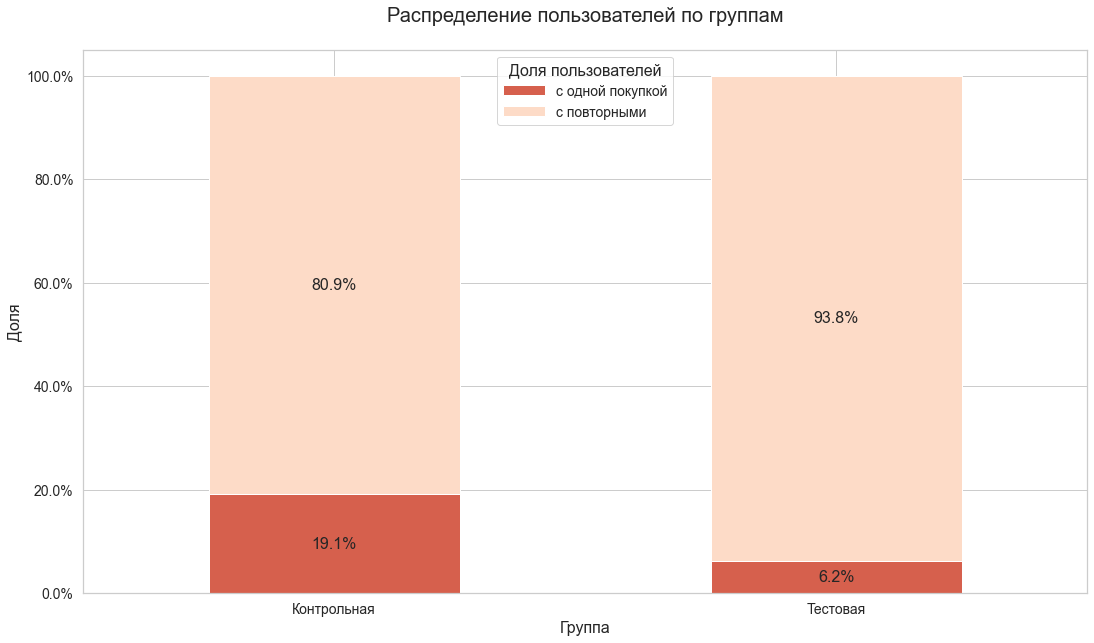

In [58]:
# Строим диаграмму

ax = norm_contingency_rpr.plot(kind="bar", stacked=True, rot=0)
ax.yaxis.set_major_locator(mticker.FixedLocator(ax.get_yticks()))
ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['Контрольная', 'Тестовая'])
ax.legend(['с одной покупкой', 'с повторными'],
          title='Доля пользователей', loc='upper center')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.1%}'.format(height),
            horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.xlabel('Группа')
plt.ylabel('Доля')
plt.title('Распределение пользователей по группам\n')
plt.show()

Из таблицы, формулы и диаграммы выше следует:   
Контрольная группа (со старым приложением): Repeat Purchase Rate = 80.9%  
Тестовая группа (с новой системой рекомендаций): Repeat Purchase Rate = 93.8%  
**Вывод: критерий хи-квадрат показал, что Repeat Purchase Rate (коэффициент повторных покупок) статзначимо изменился. Он увеличился с введением рекомендательной системы.**

# 5. Выводы

In [59]:
# Ранее полученная таблица с разностью величин между группами
difference

,total_user,total_revenue,total_order,total_product,period,repeat_purchase,aov,aos,arpu,pf,rpr
1,-11.0,295172.5,855.0,2877.0,0 days,56.0,-13.231298,0.008279,614.186997,1.772069,12.9


Мы провели статистические тесты для следующих метрик:
    
- Cancellation Rate — доля отмененных заказов
- AOV - средняя сумма заказа
- AOS - среднее размер заказа
- ARPU - средний доход с пользователя
- PF - частота покупок
- RPR - коэффициент повторных покупок

Выяснилось, что доля отмененных заказов (Cancellation Rate), средняя сумма заказа (AOV), средний размер (количество товаров) заказа (AOS) статзначимо не изменились.  
Однако вместе с этим статзначимо (по статтестам) увеличились (по таблице) средний доход с пользователя (ARPU), частота покупок (PF), коэффициент повторных покупок (RPR). То есть пользователи стали чаще покупать (делать больше заказов), чаще совершать повторную покупку, приносить больше дохода бизнесу.  
Таким образом, с введением рекомендательной системы бизнес стал приносить больше дохода, а пользователи стали лучше удовлетворять свои потребности, то есть покупать то, что им нужно.  
**Вывод: новая система рекомендаций смогла принести пользу бизнесу и пользователям приложения.**